# Titanic

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [5]:
df = pd.read_csv('input/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().values.any()

True

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#### from table we can notice that the value of count column is the same for every columns from dataset with exception Age
### lets to see Age

In [13]:
df[df['Age'].isnull()].head(40)  ### rows with null age


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [14]:
#### change Syrvided values to boolean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
# To bolean

def to_boolean(record):
    """
    """
    if record==1:
        return True
    else :
        return False

    
# to_boolean(0) test  


df['Survived'] = df['Survived'].apply(to_boolean)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 77.5+ KB


In [39]:
group  =  df[df['Survived']].groupby('Sex')
for i,j in group:
    #print(i)
    print(type(j))  #return group
group.get_group('male')  
group.get_group('female').count()  

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64

<BarContainer object of 577 artists>

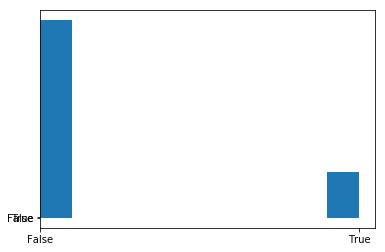

In [73]:
female,male = df.groupby('Sex')
type(male)
type(male[1])

#plt.hist()
a = male[1]['Survived'].astype(str)
type(a)
#plt.hist(a)
a = list(a)
plt.hist(a)
plt.barh(a,width=0)

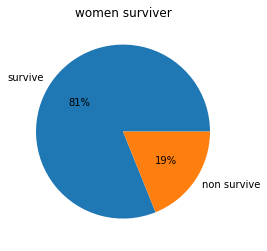

Text(0.5, 1.0, 'women surviver')

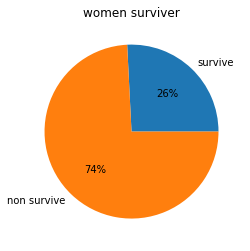

In [106]:
male = df[df['Sex']=='male']
female = df[df['Sex']=='female']
male
#plt.pie(male[male['Survived']]['Survived'])
gr = male.groupby('Survived').size()
#plt.pie(gr.get_group(True).count(),gr.get_group(False))
list(gr.index)
list(gr)
plt.pie(gr,labels=['survive','non survive'],autopct='%1.0f%%')
plt.title('women surviver')
plt.show()
#plt.pie(male[male['Survived']]['Survived'])
gr = female.groupby('Survived').size()
#plt.pie(gr.get_group(True).count(),gr.get_group(False))
list(gr.index)
list(gr)
plt.pie(gr,labels=['survive','non survive'],autopct='%1.0f%%')
plt.title('women surviver')

In [107]:
# The mans was survive more better then women